# Workshop 3: TEXT PROCESSING


In this workshop, you will use the tools demonstrated in 'Text-Processing-2019' (HLT 8) on examples of *real* texts. Firstly, in pairs within your group, go through Part 1 which looks at reading and determining the subject matter of an online news article. You may want to also try this out on news articles from today. Part 2 looks at reading raw text files and comparing lexical diversity of two famous novels. 

## Group Challenge

"Lyrics in modern popular music are simplistic and repetitive. Classic songs have so much more diversity." 

A prime example used to back up this statement is Ed Sheeran's 'Shape of You', which repeats "I'm in love with your body" over and over. The lexical diversity of this song is only 0.21. 

Can you find 4 counterexamples which challenge this statement? – 2 great songs which have a lower lexical diversity, and 2 modern songs which have a high lexical diversity. You can use BeautifulSoup to scrape the lyrics from a website, or download a text file of the lyrics.

*One example to get you started: Rage Against the Machine’s most famous song - 'Killing in the Name' scores a lowly 0.076.

Can you reliably detect the topic of the song from the 5 most common words? If not, what could be done to improve the performance?

Note that Assignment 1 which you will get on Monday will delve deeper into the topic of lexical diversity.

The outcome of the Group Challenge should be captured on the Discussion Sheet.

## Part 1: Reading HTML from the web

**Goal: Understand the subject of an online news article through content words**

A huge amount of text is available online. While it is a fantastic resource for NLP research, the HTML used to structure most web pages means accessing the content of interest can be difficult; we often end up with more tags and links than the text of interest. We will use the Python packages 'requests' and 'BeautifulSoup' to first retrieve the data, then parse the HTML.

In [44]:
import nltk
from bs4 import BeautifulSoup
import requests

If you get the error: **ModuleNotFoundError: No module named 'bs4'**, run the following command in a terminal window to install BeautifulSoup4: 

* pip install beautifulsoup4

The URL for this article is from the Florida school shooting

In [45]:
#url = 'https://www.irishtimes.com/news/world/us/florida-shooting-\teenager-charged-with-17-counts-of-murder-1.3393087'
url = 'https://www.irishtimes.com/news/ireland/irish-news/florida-shooting-victim-had-been-due-to-visit-grandparents-in-ireland-this-summer-1.3396310'
page = requests.get(url)

BeautifulSoup creates an object with methods which can be used to easily display selected sections

In [82]:
soup = BeautifulSoup(page.content, 'html.parser')
# print(soup.prettify())

That's a lot of markup and Javascript which is not relevant for us! To extract the story, we identify which tags it is contained within. In this case: 
* p class="no_name"

In [47]:
p_tags = soup.find_all('p', class_="no_name")

Check the first three p tags

In [ ]:
p_tags[:3]

.get_text() removes all tags

In [48]:
sentences = [p.get_text() for p in p_tags]
sentences[:3]

['The Co Antrim-based relatives of a victim of a US high school shooting in Florida say they have been left “broken-hearted” by her death. ',
 'Cara Loughran (14) who was a pupil at Marjory Stoneman Douglas High School in Parkland, near Miami, was one of 17 victims shot dead in a massacre on Wednesday. ',
 'The girl’s father is originally from Toome, a Co Antrim village where her grandparents Paddy and Ellie Loughran, and the extended Loughran family, live. ']

Now the sentences can be concatenated to a single string

In [84]:
mytext = ' '.join(sentences)
mytext[:1000]

'The Co Antrim-based relatives of a victim of a US high school shooting in Florida say they have been left “broken-hearted” by her death.  Cara Loughran (14) who was a pupil at Marjory Stoneman Douglas High School in Parkland, near Miami, was one of 17 victims shot dead in a massacre on Wednesday.  The girl’s father is originally from Toome, a Co Antrim village where her grandparents Paddy and Ellie Loughran, and the extended Loughran family, live.  Fr Paddy McWilliams, who knows the Loughrans, told The Irish News the couple, who are understood to be in their 70s, were “very private” people and that they were distraught at the loss of their granddaughter.  “They are just broken-hearted,” he said.  “The wee family was coming home for the summer, as they do regularly, but that’s not going to happen now.” It is believed Cara’s older brother Liam (17) was a witness to the school shooting but escaped uninjured.  Police in America have said, Nikolaz Cruz (19) a former pupil at the school, co

There's a few words at the end which are not part of the story - ' - Additional reporting: PA'. These can be manually removed by slicing to the first index of the unwanted words. Here the last 50 characters of the remaining text are displayed.

In [50]:
mytext = mytext[:mytext.index(' - Additional')]
mytext[-50:]

'ndlelight vigil on Thursday night near the school.'

Tokenize the string into individual words showing the first 30

In [51]:
tokens = nltk.word_tokenize(mytext)
print(tokens[:30])

['The', 'Co', 'Antrim-based', 'relatives', 'of', 'a', 'victim', 'of', 'a', 'US', 'high', 'school', 'shooting', 'in', 'Florida', 'say', 'they', 'have', 'been', 'left', '“', 'broken-hearted', '”', 'by', 'her', 'death', '.', 'Cara', 'Loughran', '(']


In [52]:
len(tokens)

667

We can remove punctuation and change all tokens to lowercase by using .lower() and .isalnum()

In [ ]:
words_n_nums = [t.lower() for t in tokens if t.isalnum()]
print(words_n_nums[:30])

Sorting the tokens can be useful for inspection (e.g. here showing first 20 and last 20)

In [53]:
sorted_words_n_nums = sorted(words_n_nums)
print(sorted_words_n_nums[:20])

['14', '14', '17', '17', '17', '17', '19', '70s', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']


In [ ]:
print(sorted_words_n_nums[-20:])

Frequency distribution provides ordered counts of tokens

In [54]:
fd = nltk.FreqDist(words_n_nums)
print(fd.most_common(10))

[('the', 34), ('a', 16), ('to', 15), ('and', 13), ('school', 12), ('in', 12), ('was', 9), ('at', 9), ('of', 8), ('s', 8)]


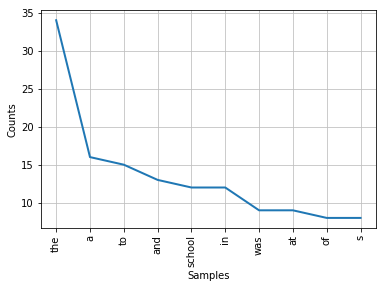

In [55]:
fd.plot(10)

From these 10 most common words, would you be able to guess the content of this article? Probably not. The only word which gives us any useful information is *'school'*.

There are a lot of stopwords (e.g. 'the, 'a', 'of') which don't provide much information on the content of the article. In addition, 'shoot', 'shot', 'shooting', 'shoots', 'shooter' will all have separate counts when it would be more appropriate to combine them into a single token.

To remove stopwords, nltk provides an in-built list. 

In [56]:
from nltk.corpus import stopwords
filtered_words = [w.lower() for w in words_n_nums if w.lower() not in stopwords.words('english')]

To combine counts for words with the same stem, we can use nltk's Porter stemmer

In [57]:
porter = nltk.PorterStemmer()

In [58]:
stemmed_words = [porter.stem(w) for w in filtered_words]

In [59]:
print(stemmed_words[:10])

['co', 'rel', 'victim', 'us', 'high', 'school', 'shoot', 'florida', 'say', 'left']


In [60]:
fd = nltk.FreqDist(stemmed_words)
print(fd.most_common(10))

[('school', 12), ('shoot', 6), ('cara', 6), ('trump', 6), ('victim', 5), ('high', 4), ('loughran', 4), ('17', 4), ('peopl', 4), ('said', 4)]


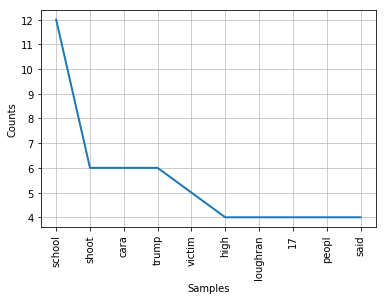

In [61]:
fd.plot(10)

Now it is possible to quickly grasp the subject matter of the article - a serious school shooting.

## Part 2: Reading text files

**Goal: Compare the lexical diversity of two of Ireland's most famous novels, Ulysses and Dracula.**

Download the following raw text files into your current directory

'Ulysses' by James Joyce: https://raw.githubusercontent.com/mattf/joyce/master/james-joyce-ulysses.txt

'Dracula' by Bram Stoker: https://raw.githubusercontent.com/processing/processing-docs/master/content/examples/Topics/Advanced%20Data/HashMapClass/data/dracula.txt

Load the text files using the following code:

In [62]:
def load_txt(file):
    with open(file, encoding="utf8") as f:
        x = ' '.join(line.strip() for line in f.readlines())
        f.close()
        return x

In [63]:
ulysses_txt = load_txt('../input/james-joyce-ulysses.txt')
dracula_txt = load_txt('../input/dracula.txt')

Introduction and end include text we don't need. You can check the first N characters by slicing the string just like a list, e.g. list_name[:N]

In [64]:
ulysses_txt[:1000]

'\ufeff   The Project Gutenberg EBook of Ulysses, by James Joyce  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org   Title: Ulysses  Author: James Joyce  Release Date: August 1, 2008 [EBook #4300] Last Updated: May 16, 2016  Language: English  Character set encoding: UTF-8  *** START OF THIS PROJECT GUTENBERG EBOOK ULYSSES ***     Produced by Col Choat, and David Widger        ULYSSES   by James Joyce      Contents — I —  [ 1 ] [ 2 ] [ 3 ] — II —  [ 4 ] [ 5 ] [ 6 ] [ 7 ] [ 8 ] [ 9 ] [ 10 ] [ 11 ] [ 12 ] [ 13 ] [ 14 ] [ 15 ] — III —  [ 16 ] [ 17 ] [ 18 ]          — I —      [ 1 ]  Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. A yellow dressinggown, ungirdled, was sustained gently behind him on the mild morning air. 

Find the location of the first word of interest - 'Stately'

In [ ]:
ulysses_txt.find('Stately')

Find the location of the end - easily found by the string 'End of the Project Gutenberg'

In [65]:
ulysses_txt.find('End of the Project Gutenberg')

1511872

Splice the text to get that raw content we are interested in. You can splice between two numbers (N,M) by using list_name[N:M]

In [66]:
ulysses_raw = ulysses_txt[781:1511872]

Check the beginning and end

In [67]:
ulysses_raw[:200]

'Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. A yellow dressinggown, ungirdled, was sustained gently behind him on the mild '

In [ ]:
ulysses_raw[-200:]

Repeat for Dracula

In [ ]:
dracula_txt.find('3 May')

In [ ]:
dracula_txt.find('End of the Project Gutenberg')

In [70]:
dracula_raw = dracula_txt[1400:838863]
# dracula_raw

Tokenize the raw content

In [71]:
ulysses_tokens = nltk.word_tokenize(ulysses_raw)
dracula_tokens = nltk.word_tokenize(dracula_raw)

Check the output is a list of words

In [72]:
print(ulysses_tokens[:10])

['Stately', ',', 'plump', 'Buck', 'Mulligan', 'came', 'from', 'the', 'stairhead', ',']


**Lexical Diversity Calculation**

Recall that lexical diversity is calculated by dividing the number of unique words  by the total number of words. For example:

"yes no yes no yes no yes no yes no" = 2/10 -> 0.2

"I went to the cinema and watched a great film" = 10/10 -> 1.0

In [73]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [74]:
lexical_diversity(ulysses_tokens)

0.10927183849669883

In [75]:
lexical_diversity(dracula_tokens)

0.05514435723490133

It appears that Ulysses has nearly twice the lexical diversity of Dracula. Why do you think this is? 

## Part 3: An additional step beyond the workshop activities which may be useful:

Now look at the parts of speech of the words in the texts. Note that you can make the tags to the categories that you might be more familiar with, and group some of the tags. 

In [76]:
def wordnet_pos(tag):
    if tag.startswith('J'):
        return 'adj'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'adv'
    else:
        return ''

In [77]:
ulysses_nopunct = [t.lower() for t in ulysses_tokens if t.isalnum()]
print(ulysses_nopunct[:30])

['stately', 'plump', 'buck', 'mulligan', 'came', 'from', 'the', 'stairhead', 'bearing', 'a', 'bowl', 'of', 'lather', 'on', 'which', 'a', 'mirror', 'and', 'a', 'razor', 'lay', 'crossed', 'a', 'yellow', 'dressinggown', 'ungirdled', 'was', 'sustained', 'gently', 'behind']


In [ ]:
tagged = nltk.pos_tag(ulysses_nopunct)
print(tagged)[:100]

In [79]:
wnl = nltk.WordNetLemmatizer()
wnl.lemmatize('Stately', pos='n')

'Stately'

In [80]:
ulysses_nouns = [word for word, tag in tagged if wordnet_pos(tag) == 'n']
print(ulysses_nouns[:30])

['buck', 'mulligan', 'stairhead', 'bowl', 'lather', 'mirror', 'razor', 'lay', 'dressinggown', 'morning', 'air', 'bowl', 'ad', 'altare', 'dei', 'dark', 'stairs', 'kinch', 'jesuit', 'round', 'gunrest', 'tower', 'land', 'awaking', 'sight', 'dedalus', 'towards', 'crosses', 'air', 'throat']


In [81]:
len(ulysses_nouns)

71871

Now try this for the other categories.